In [1]:
import pandas as pd 
import numpy as np 
import math
from datetime import datetime
import random

import sklearn 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from xgboost import XGBClassifier

In [2]:
# Read the dataset
data = pd.read_csv('updated.csv')
data.head()

,suburb,density,type_of_property,price,rooms,bedroom,toilets,ensuite,toilets_type,local_authority,...,garage,swimming_pool,fixtures_fittings,cottage,power,power_backup,water,water_backup,gated_community,garden_area
0,Borrowdale Brooke,Low,House,3000,8,3,3,1,Self,Harare Municipality,...,0,0,1,0,1,0,1,0,1,1
1,Borrowdale,Low,House,1800,7,4,3,2,Self,Harare Municipality,...,2,1,1,0,1,1,1,1,0,1
2,Borrowdale,Low,House,2500,7,2,2,1,Self,Harare Municipality,...,0,1,1,0,1,1,1,0,0,1
3,Borrowdale Brooke,Low,House,3000,7,4,2,1,Self,Harare Municipality,...,0,1,1,1,1,1,1,1,1,1
4,Borrowdale,Low,House,1700,6,4,2,1,Self,Harare Municipality,...,0,0,1,3,1,0,1,0,1,1


In [3]:
data.shape

(58, 21)

In [4]:
data.isnull().sum()

suburb               0
density              0
type_of_property     0
price                0
rooms                0
bedroom              0
toilets              0
ensuite              0
toilets_type         0
local_authority      0
ward                 0
garage               0
swimming_pool        0
fixtures_fittings    0
cottage              0
power                0
power_backup         0
water                0
water_backup         0
gated_community      0
garden_area          0
dtype: int64

In [5]:
data.nunique()

suburb               20
density               3
type_of_property      5
price                30
rooms                11
bedroom               6
toilets               6
ensuite               6
toilets_type          2
local_authority       3
ward                 13
garage                3
swimming_pool         2
fixtures_fittings     2
cottage               4
power                 2
power_backup          2
water                 2
water_backup          2
gated_community       2
garden_area           2
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   suburb             58 non-null     object
 1   density            58 non-null     object
 2   type_of_property   58 non-null     object
 3   price              58 non-null     int64 
 4   rooms              58 non-null     int64 
 5   bedroom            58 non-null     int64 
 6   toilets            58 non-null     int64 
 7   ensuite            58 non-null     int64 
 8   toilets_type       58 non-null     object
 9   local_authority    58 non-null     object
 10  ward               58 non-null     int64 
 11  garage             58 non-null     int64 
 12  swimming_pool      58 non-null     int64 
 13  fixtures_fittings  58 non-null     int64 
 14  cottage            58 non-null     int64 
 15  power              58 non-null     int64 
 16  power_backup       58 non-null     int64 
 17 

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bedroom'}>,
        <Axes: title={'center': 'toilets'}>],
       [<Axes: title={'center': 'ensuite'}>,
        <Axes: title={'center': 'ward'}>,
        <Axes: title={'center': 'garage'}>,
        <Axes: title={'center': 'swimming_pool'}>],
       [<Axes: title={'center': 'fixtures_fittings'}>,
        <Axes: title={'center': 'cottage'}>,
        <Axes: title={'center': 'power'}>,
        <Axes: title={'center': 'power_backup'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'water_backup'}>,
        <Axes: title={'center': 'gated_community'}>,
        <Axes: title={'center': 'garden_area'}>]], dtype=object)

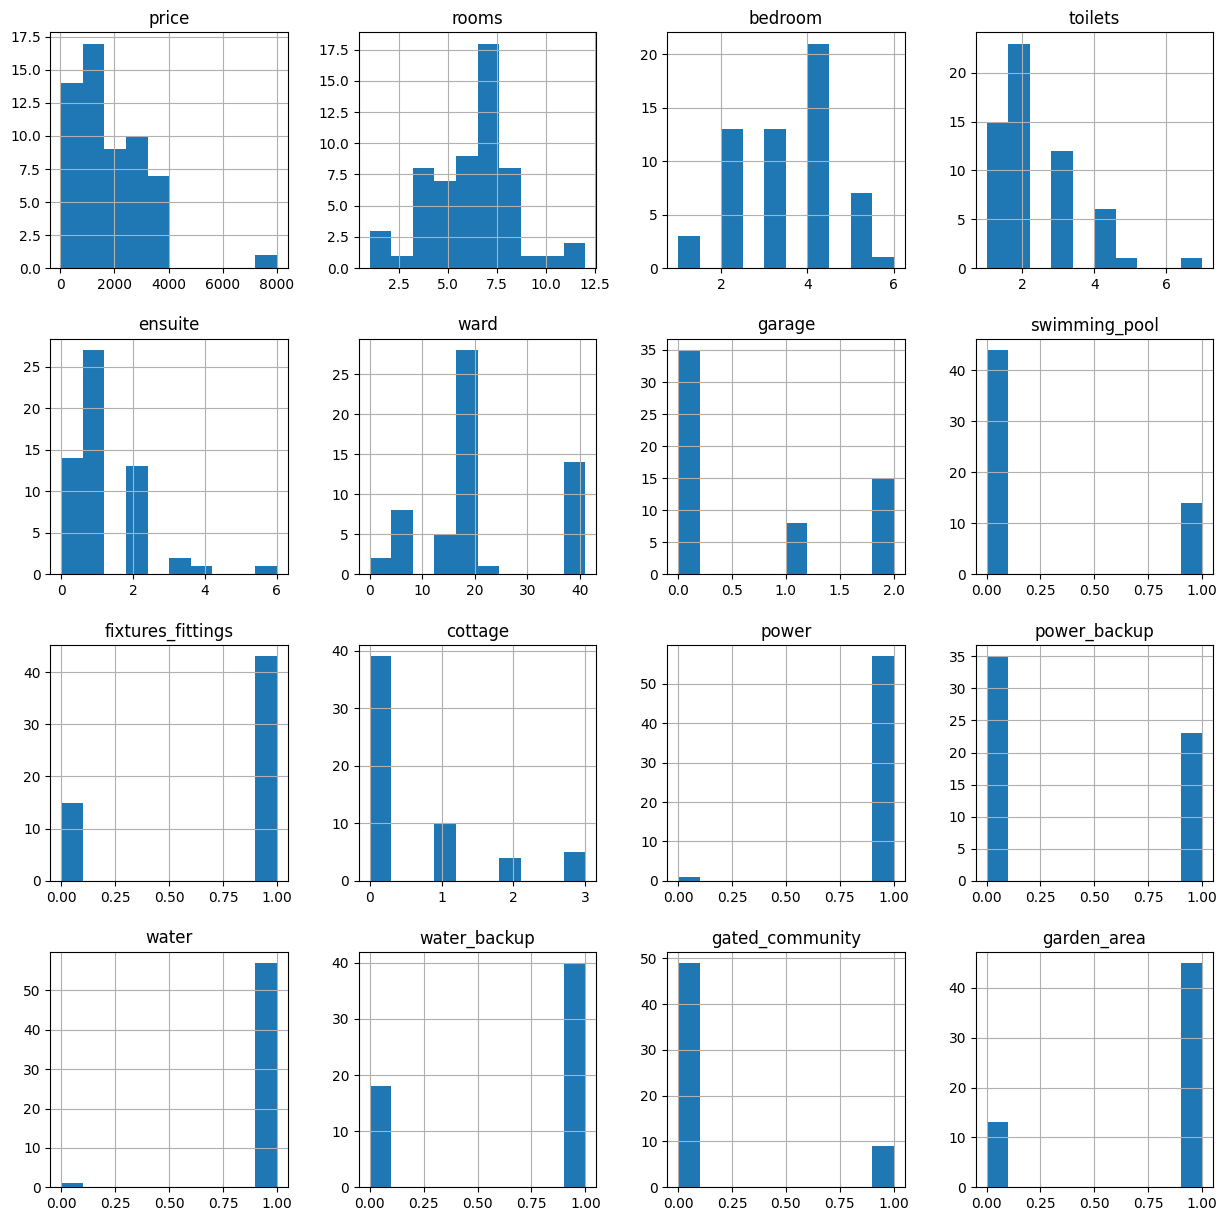

In [7]:
data.hist(figsize=(15,15))

In [8]:
data.describe()

,price,rooms,bedroom,toilets,ensuite,ward,garage,swimming_pool,fixtures_fittings,cottage,power,power_backup,water,water_backup,gated_community,garden_area
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1799.482759,6.224138,3.327586,2.293103,1.189655,21.051724,0.655172,0.241379,0.741379,0.568966,0.982759,0.396552,0.982759,0.689655,0.155172,0.775862
std,1372.314503,2.127869,1.160580,1.184825,1.083479,12.252350,0.869598,0.431657,0.441701,0.957190,0.131306,0.493454,0.131306,0.466675,0.365231,0.420655
min,40.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,5.000000,2.000000,1.250000,1.000000,16.250000,0.000000,0.000000,0.250000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,1400.000000,7.000000,3.500000,2.000000,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,2650.000000,7.000000,4.000000,3.000000,2.000000,21.250000,1.750000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,8000.000000,12.000000,6.000000,7.000000,6.000000,41.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'type_of_property')

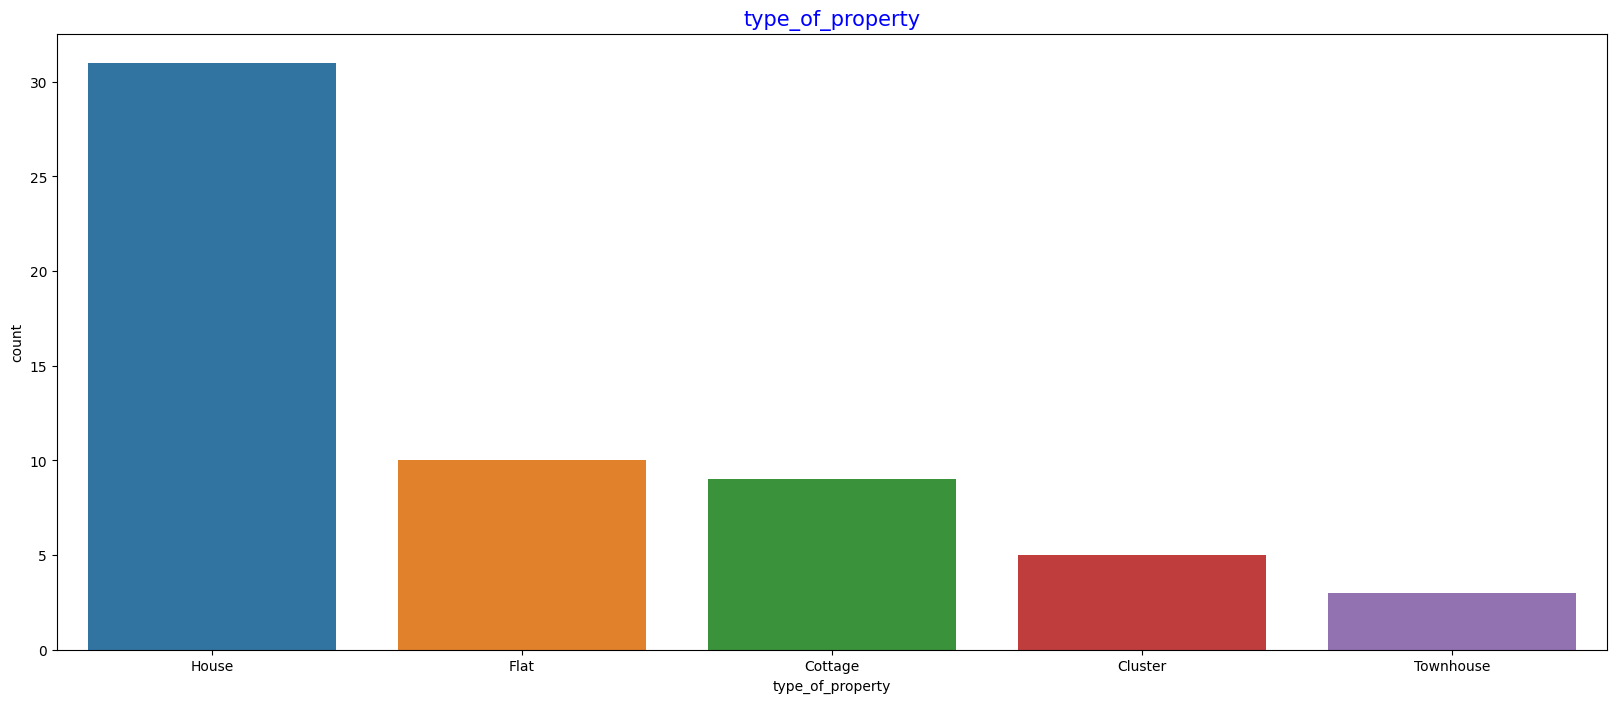

In [9]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='type_of_property', order=data['type_of_property'].value_counts().index)
plt.title("type_of_property", color='blue', fontsize=15)

In [10]:
from sklearn.preprocessing import LabelEncoder
LabelEncoding= LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col]= LabelEncoding.fit_transform(data[col])

In [11]:
correlation_mat = data.corr()

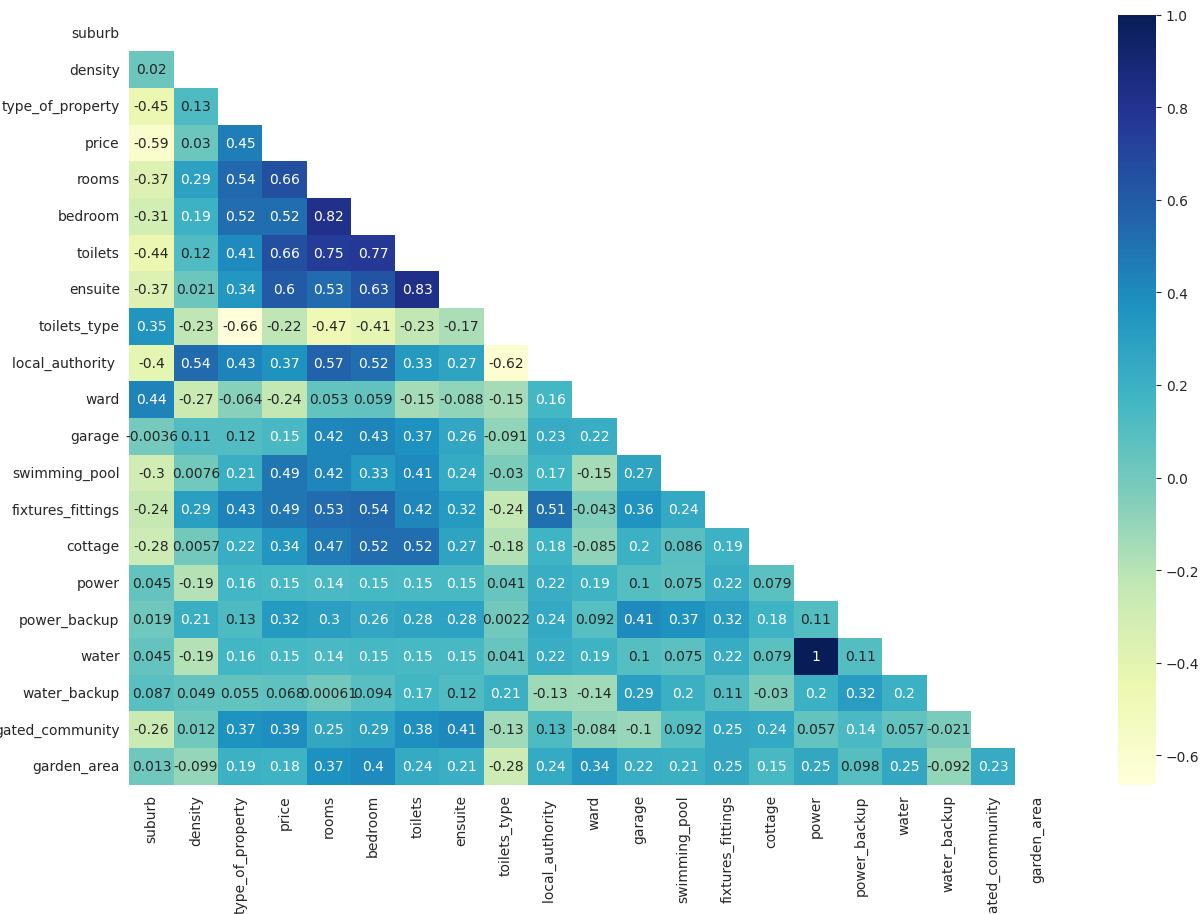

In [12]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    #f, ax = plt.subplots(figsize=(7,6))
    f, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

In [13]:
x = data.values[:,0:20]
x

array([[ 2,  1,  3, ...,  1,  0,  1],
       [ 0,  1,  3, ...,  1,  1,  0],
       [ 1,  1,  3, ...,  1,  0,  0],
       ...,
       [19,  0,  0, ...,  1,  1,  0],
       [17,  0,  3, ...,  1,  1,  0],
       [15,  1,  1, ...,  1,  0,  0]], dtype=int64)

In [14]:
x.shape

(58, 20)

In [15]:
y = data.values[:,-1]
y

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [16]:
y.shape

(58,)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
Feature_Scaling = StandardScaler()

In [19]:
x_scaled = Feature_Scaling.fit_transform(x)
x_scaled

array([[-0.95054058, -0.37647348,  0.64449099, ...,  0.13245324,
        -1.49071198,  2.33333333],
       [-1.2551337 , -0.37647348,  0.64449099, ...,  0.13245324,
         0.67082039, -0.42857143],
       [-1.10283714, -0.37647348,  0.64449099, ...,  0.13245324,
        -1.49071198, -0.42857143],
       ...,
       [ 1.63850089, -2.19609532, -2.15904483, ...,  0.13245324,
         0.67082039, -0.42857143],
       [ 1.33390778, -2.19609532,  0.64449099, ...,  0.13245324,
         0.67082039, -0.42857143],
       [ 1.02931466, -0.37647348, -1.22453289, ...,  0.13245324,
        -1.49071198, -0.42857143]])

In [20]:
x_train,x_test,y_train,y_test=train_test_split (x_scaled,y,test_size=0.2,random_state=32)

In [21]:
x_test.shape

(12, 20)

In [22]:
y_test.shape

(12,)

In [23]:
x_train.shape

(46, 20)

In [24]:
y_train.shape

(46,)

In [25]:
model = tf.keras.models.Sequential()## create a model 
model.add(tf.keras.layers.Dense(8,input_dim=20,activation='relu'))## create a hidden layer with 50 neurons with 11 features
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("Policy rooms Predictor.h5", 
                                                monitor='val_acc', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                save_weights_only=False,
                                                mode='auto',
                                                save_freq=1)
#checking performance every epoch

In [29]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='tb_logs', 
                                             histogram_freq=1,
                                             write_graph=True, 
                                             write_images=True)

In [30]:
history=model.fit(x_train,y_train,
                  epochs=8,
                  batch_size=5,
                  verbose=1,
                  validation_split=0.1)

Epoch 1/8


9/9 [==============================] - 2s 41ms/step - loss: 0.7312 - accuracy: 0.4146 - val_loss: 0.7819 - val_accuracy: 0.6000
Epoch 2/8
9/9 [==============================] - 0s 8ms/step - loss: 0.7018 - accuracy: 0.4390 - val_loss: 0.7453 - val_accuracy: 0.6000
Epoch 3/8
9/9 [==============================] - 0s 7ms/step - loss: 0.6774 - accuracy: 0.5610 - val_loss: 0.7146 - val_accuracy: 0.6000
Epoch 4/8
9/9 [==============================] - 0s 8ms/step - loss: 0.6582 - accuracy: 0.5610 - val_loss: 0.6932 - val_accuracy: 0.6000
Epoch 5/8
9/9 [==============================] - 0s 8ms/step - loss: 0.6396 - accuracy: 0.6341 - val_loss: 0.6920 - val_accuracy: 0.4000
Epoch 6/8
9/9 [==============================] - 0s 9ms/step - loss: 0.6216 - accuracy: 0.7317 - val_loss: 0.6927 - val_accuracy: 0.4000
Epoch 7/8
9/9 [==============================] - 0s 7ms/step - loss: 0.6028 - accuracy: 0.7317 - val_loss: 0.6951 - val_accuracy: 0.6000
Epoch 8/8
9/9 [=======================

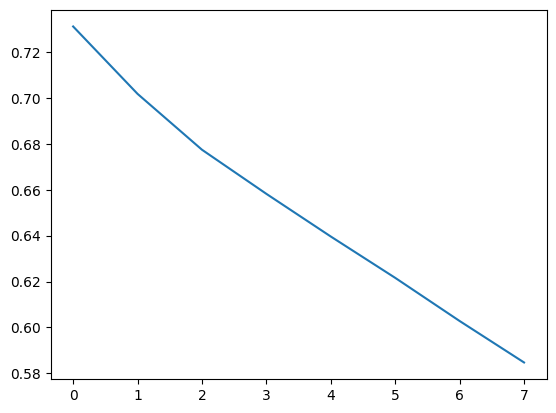

In [31]:
# Visualising loss of the model

plt.plot(history.history['loss'])

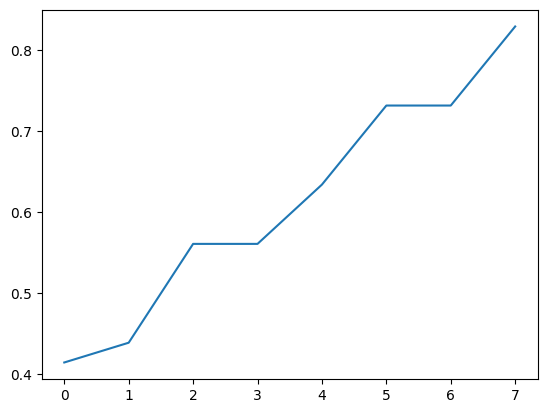

In [32]:
# Visualising accuracy of the model

plt.plot(history.history['accuracy'])

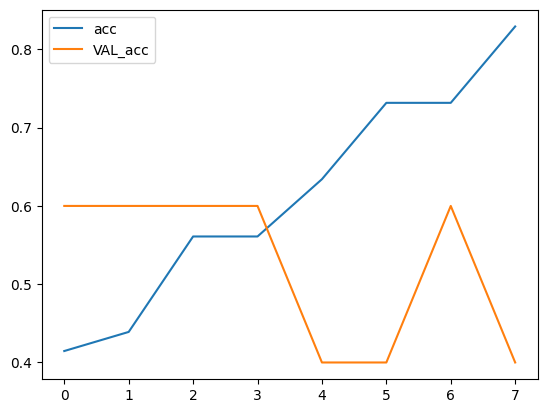

In [33]:
# Co-plotting accuracy and validation accuracy of the model on the same axis

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='VAL_acc')
plt.legend()

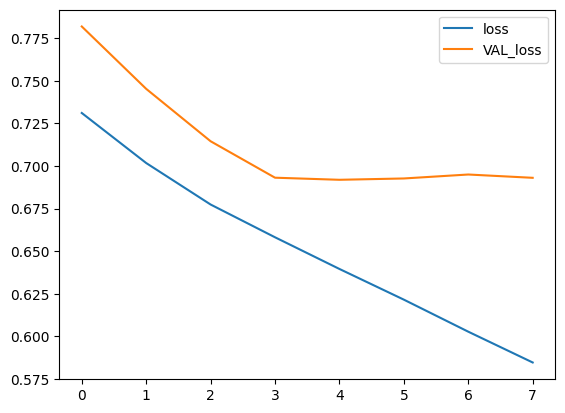

In [34]:
# Co-plotting loss and validation loss of the model on the same axis

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='VAL_loss')
plt.legend()

In [35]:
model.evaluate(x_train,y_train)

2/2 [==============================] - 0s 8ms/step - loss: 0.5839 - accuracy: 0.8043


[0.5838716626167297, 0.804347813129425]

In [36]:
# p=model.predict_classes(x_test)
# p

predictions = model.predict(x_test)
p = np.argmax(predictions, axis=1)
p

1/1 [==============================] - 0s 262ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
from sklearn import metrics

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p))
print("Accuracy:",metrics.accuracy_score(y_test, p))

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         2
           1       0.00      0.00      0.00        10

    accuracy                           0.17        12
   macro avg       0.08      0.50      0.14        12
weighted avg       0.03      0.17      0.05        12

Accuracy: 0.16666666666666666


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [39]:
model = tf.keras.models.Sequential()## create a model 
model.add(tf.keras.layers.Dense(500,input_dim=20,activation='relu'))## create a hidden layer with 50 neurons with 11 features
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [40]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               10500     
                                                                 
 dense_5 (Dense)             (None, 100)               50100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)              

In [41]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("Policy rooms Predictor.h5", 
                                                monitor='val_acc', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                save_weights_only=False,
                                                mode='auto',
                                                save_freq=1)
# checking performance every epoch

In [43]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            min_delta=0,
                                            patience=10,
                                            verbose=1,
                                            mode='auto')

In [44]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='tb_logs', 
                                             histogram_freq=1,
                                             write_graph=True, 
                                             write_images=True)

In [45]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=2,  
                    verbose=1, 
                    validation_split=0.2,
                    callbacks=[checkpoint, earlystop, tensorboard])

Epoch 1/10
18/18 [==============================] - 4s 68ms/step - loss: 0.5799 - accuracy: 0.8056 - val_loss: 0.7719 - val_accuracy: 0.6000
Epoch 2/10
18/18 [==============================] - 1s 66ms/step - loss: 0.3502 - accuracy: 0.8056 - val_loss: 1.0828 - val_accuracy: 0.6000
Epoch 3/10
18/18 [==============================] - 1s 41ms/step - loss: 0.2592 - accuracy: 0.8056 - val_loss: 1.1349 - val_accuracy: 0.6000
Epoch 4/10
18/18 [==============================] - 1s 33ms/step - loss: 0.1865 - accuracy: 0.8889 - val_loss: 2.5512 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 1s 30ms/step - loss: 0.1674 - accuracy: 0.9167 - val_loss: 2.0689 - val_accuracy: 0.6000
Epoch 6/10
18/18 [==============================] - 1s 30ms/step - loss: 0.1010 - accuracy: 0.9722 - val_loss: 3.3114 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 1s 32ms/step - loss: 0.0895 - accuracy: 0.9444 - val_loss: 3.3693 - val_accuracy: 0.5000
Epoch 8/10
18

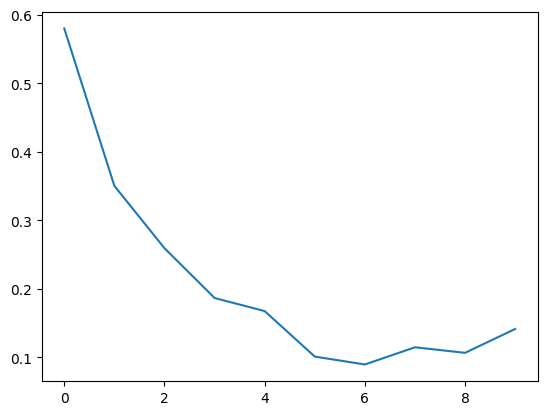

In [46]:
plt.plot(history.history['loss'])

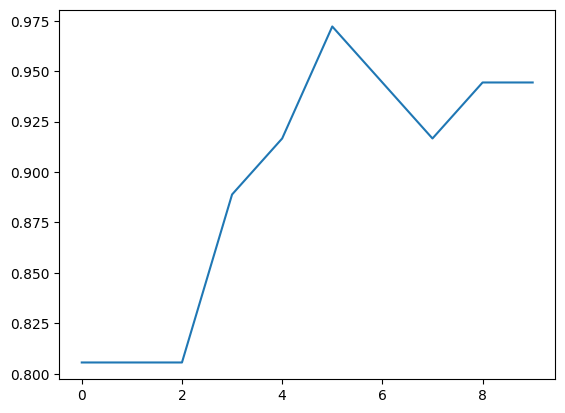

In [47]:
plt.plot(history.history['accuracy'])

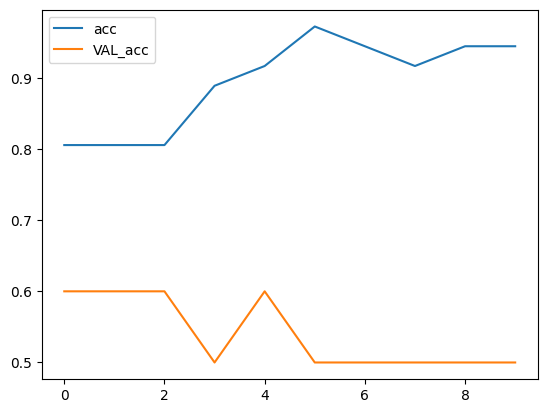

In [48]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='VAL_acc')
plt.legend()

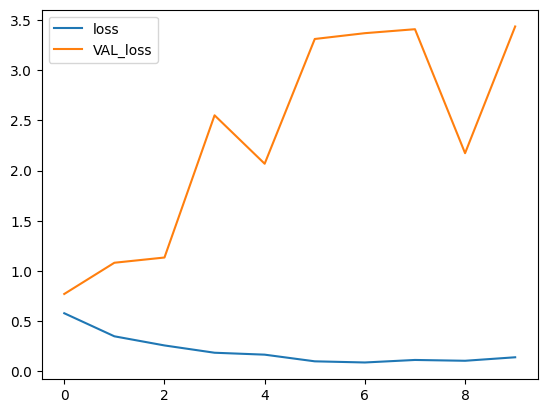

In [49]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='VAL_loss')
plt.legend()

In [50]:
model.evaluate(x_train,y_train)

2/2 [==============================] - 0s 9ms/step - loss: 0.7800 - accuracy: 0.8913


[0.7800430059432983, 0.8913043737411499]

In [51]:
# p=model.predict_classes(x_test)

predictions = model.predict(x_test)
p = np.argmax(predictions, axis=1)
p

1/1 [==============================] - 0s 154ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
from sklearn import metrics

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p))
print("Accuracy:",metrics.accuracy_score(y_test, p))

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         2
           1       0.00      0.00      0.00        10

    accuracy                           0.17        12
   macro avg       0.08      0.50      0.14        12
weighted avg       0.03      0.17      0.05        12

Accuracy: 0.16666666666666666


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier